In [155]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [111]:
df=pd.read_csv("insurance.csv")

In [112]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [113]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [114]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Feature engineering



In [116]:
male=pd.get_dummies(df['sex'])

In [117]:
male

,female,male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1333,False,True
1334,True,False
1335,True,False
1336,True,False


In [118]:
male=pd.get_dummies(df['sex'],drop_first=True)
male

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [119]:
df = pd.get_dummies(df, columns=['sex'])



In [120]:
df

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,True,False
1,18,33.770,1,no,southeast,1725.55230,False,True
2,28,33.000,3,no,southeast,4449.46200,False,True
3,33,22.705,0,no,northwest,21984.47061,False,True
4,32,28.880,0,no,northwest,3866.85520,False,True
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,False,True
1334,18,31.920,0,no,northeast,2205.98080,True,False
1335,18,36.850,0,no,southeast,1629.83350,True,False
1336,21,25.800,0,no,southwest,2007.94500,True,False


In [121]:
df['sex_male']=df['sex_male'].apply(lambda x: 1 if x ==True else 0)

In [122]:
df

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,True,0
1,18,33.770,1,no,southeast,1725.55230,False,1
2,28,33.000,3,no,southeast,4449.46200,False,1
3,33,22.705,0,no,northwest,21984.47061,False,1
4,32,28.880,0,no,northwest,3866.85520,False,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,False,1
1334,18,31.920,0,no,northeast,2205.98080,True,0
1335,18,36.850,0,no,southeast,1629.83350,True,0
1336,21,25.800,0,no,southwest,2007.94500,True,0


In [123]:
df.drop(columns="sex_female",inplace=True)

In [124]:
df['Sex']=df['sex_male']

In [125]:
df.drop(columns="sex_male",inplace=True)

In [126]:
df

,age,bmi,children,smoker,region,charges,Sex
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


In [127]:
df['smoker']=df['smoker'].apply(lambda x: 1 if x =='yes' else 0)

In [128]:
df

,age,bmi,children,smoker,region,charges,Sex
0,19,27.900,0,1,southwest,16884.92400,0
1,18,33.770,1,0,southeast,1725.55230,1
2,28,33.000,3,0,southeast,4449.46200,1
3,33,22.705,0,0,northwest,21984.47061,1
4,32,28.880,0,0,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,northwest,10600.54830,1
1334,18,31.920,0,0,northeast,2205.98080,0
1335,18,36.850,0,0,southeast,1629.83350,0
1336,21,25.800,0,0,southwest,2007.94500,0


EDA

Distribution of gender

In [129]:
df['Sex'].value_counts()

Sex
1    676
0    662
Name: count, dtype: int64

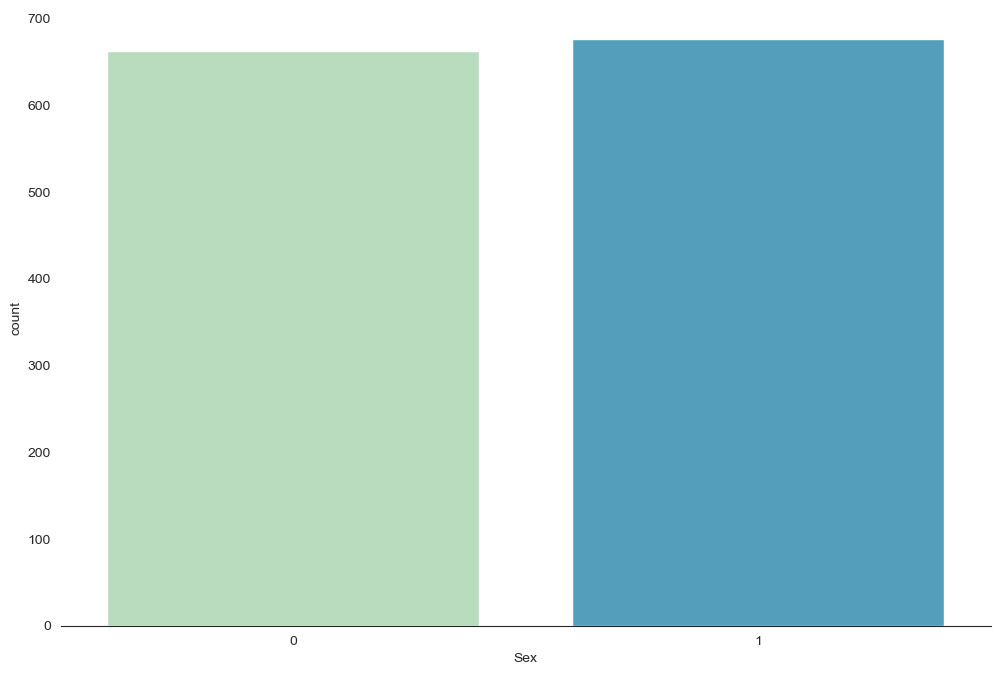

In [130]:
plt.figure(figsize=(12,8))
sns.set_style('white')
sns.countplot(x='Sex',data=df,palette='GnBu')
sns.despine(left=True)

Relation of smoking with charges

/Users/chinmay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


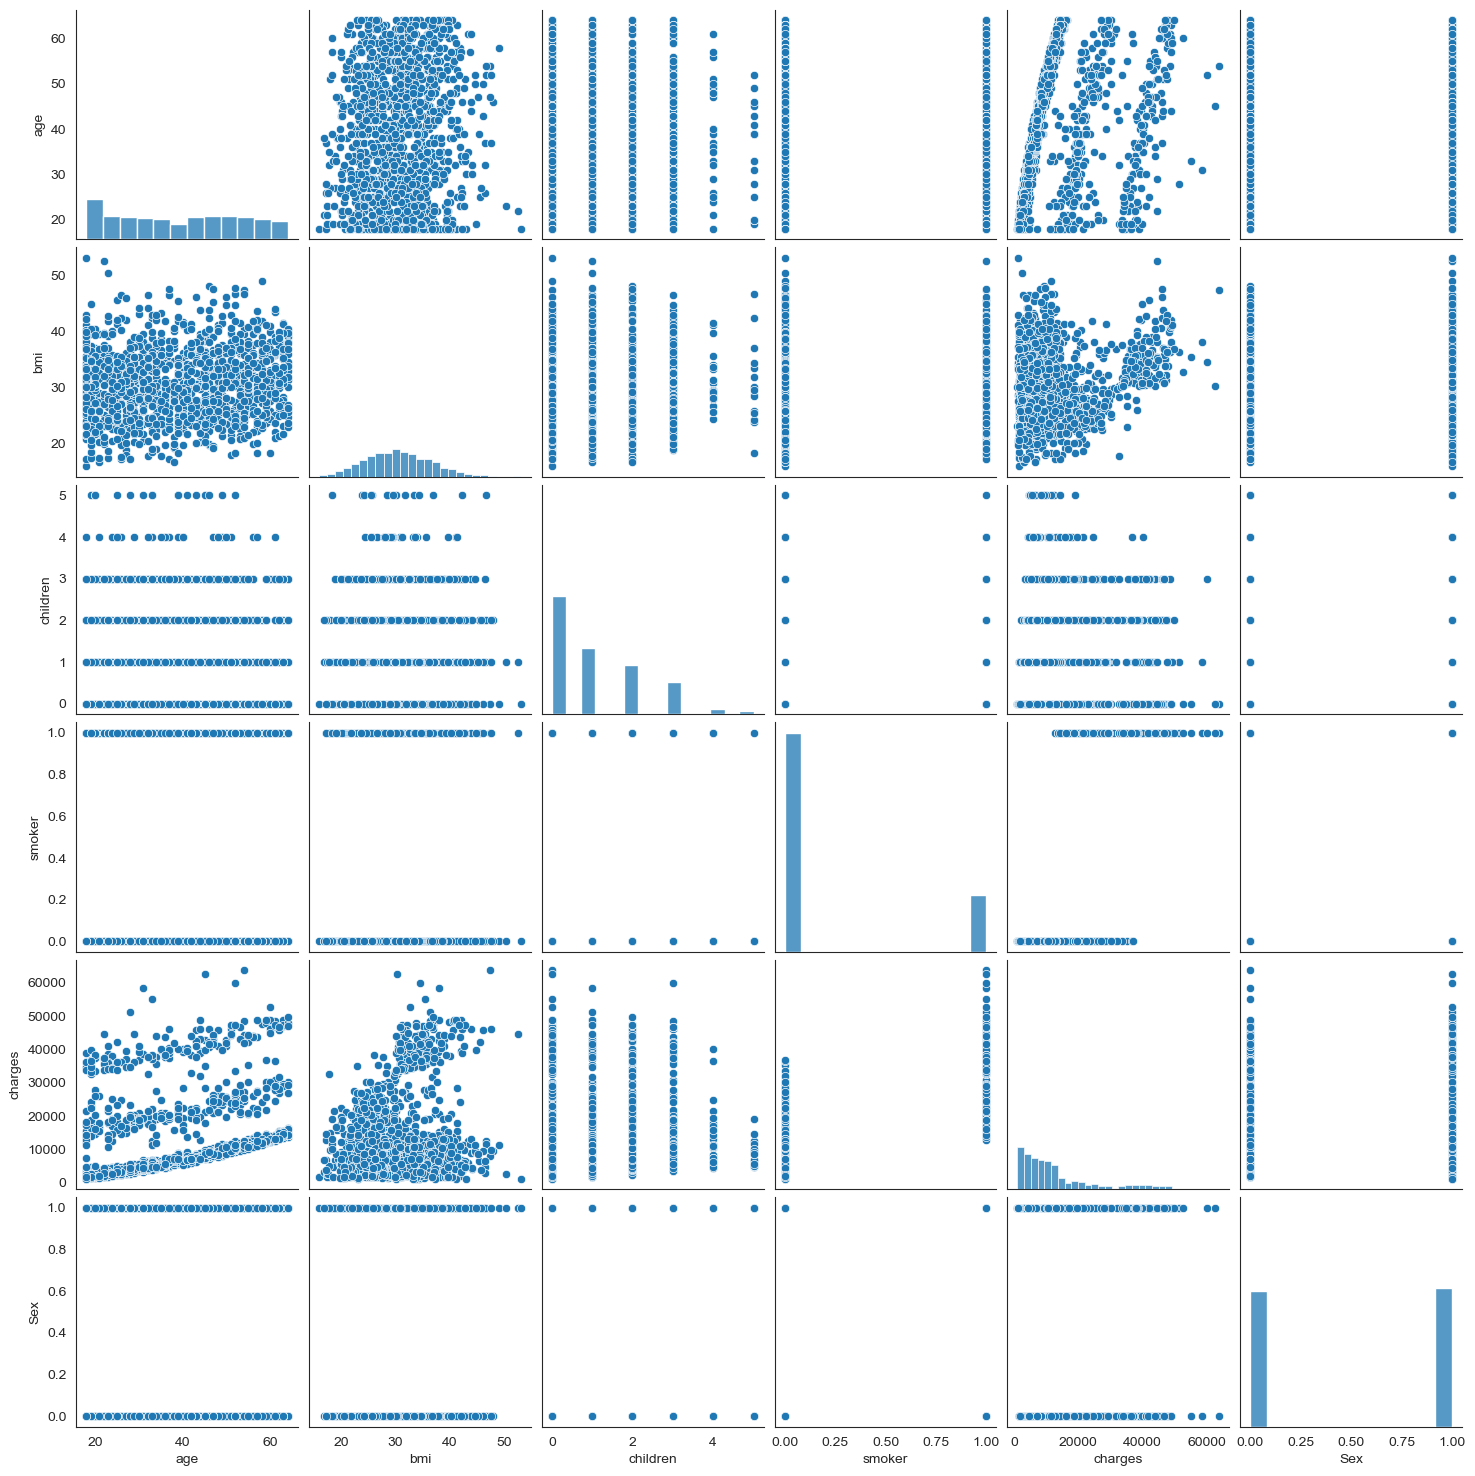

In [131]:
sns.pairplot(df)

<Axes: >

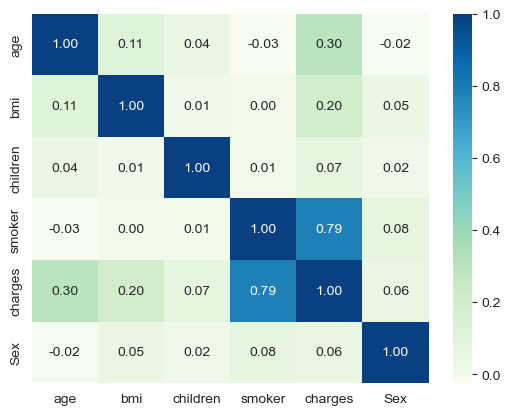

In [132]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='GnBu', fmt='.2f')

Relation of smoking with gender with charges

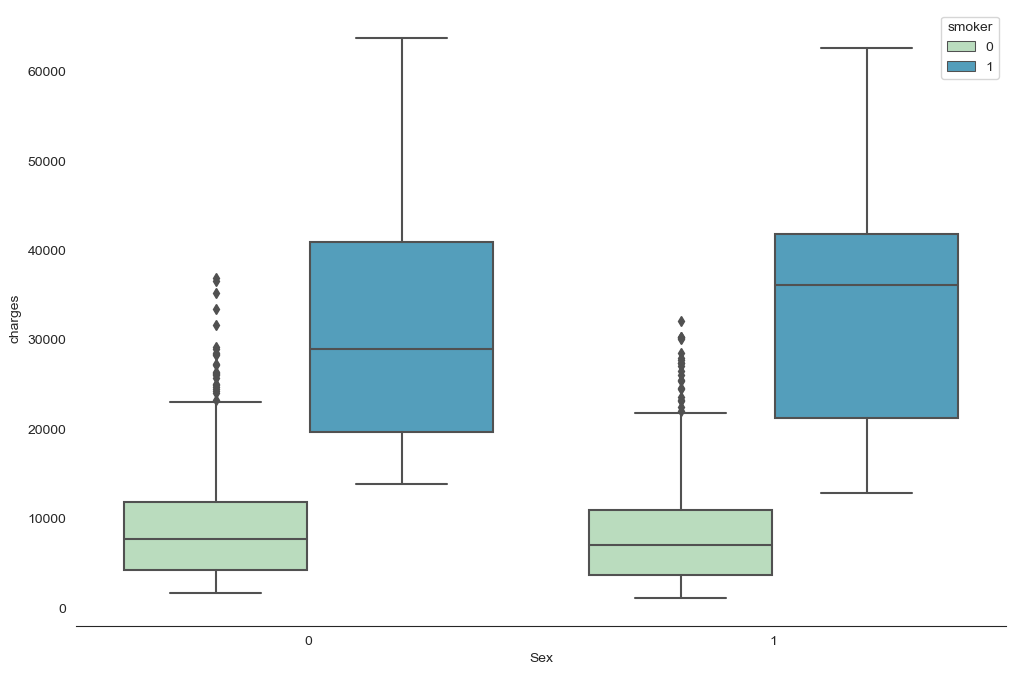

In [133]:
plt.figure(figsize=(12,8))
sns.set_style('white')
sns.boxplot(x='Sex',y='charges',data=df,palette='GnBu',hue='smoker')
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

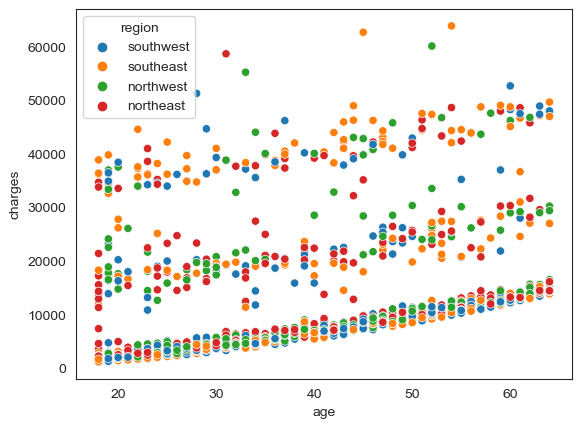

In [134]:
sns.scatterplot(data=df,x='age',y='charges',hue='region')

<Axes: xlabel='age', ylabel='charges'>

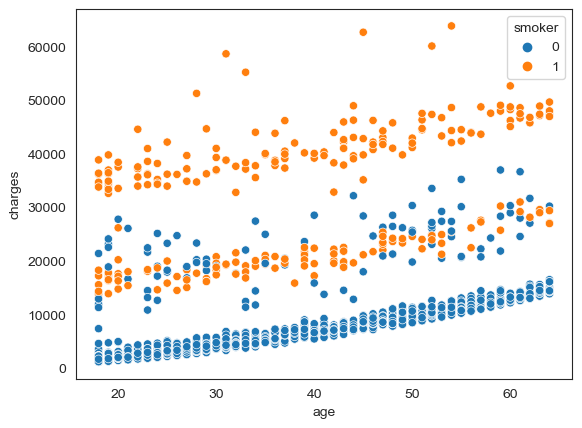

In [135]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

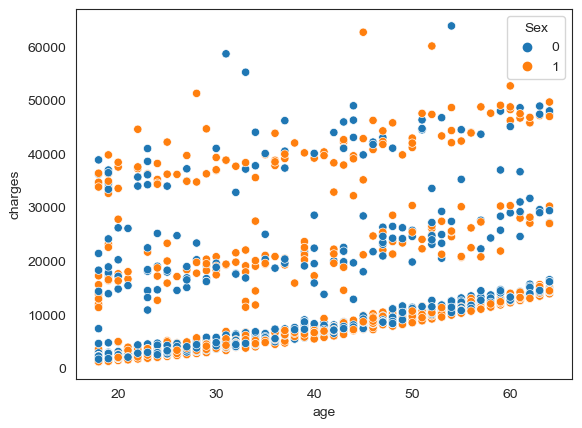

In [136]:
sns.scatterplot(data=df,x='age',y='charges',hue='Sex')

<Axes: xlabel='bmi', ylabel='charges'>

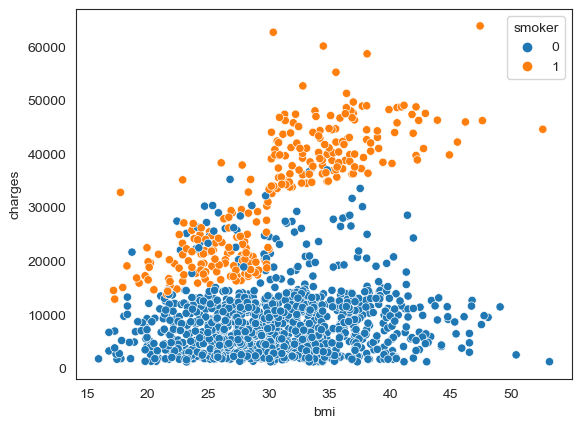

In [137]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')

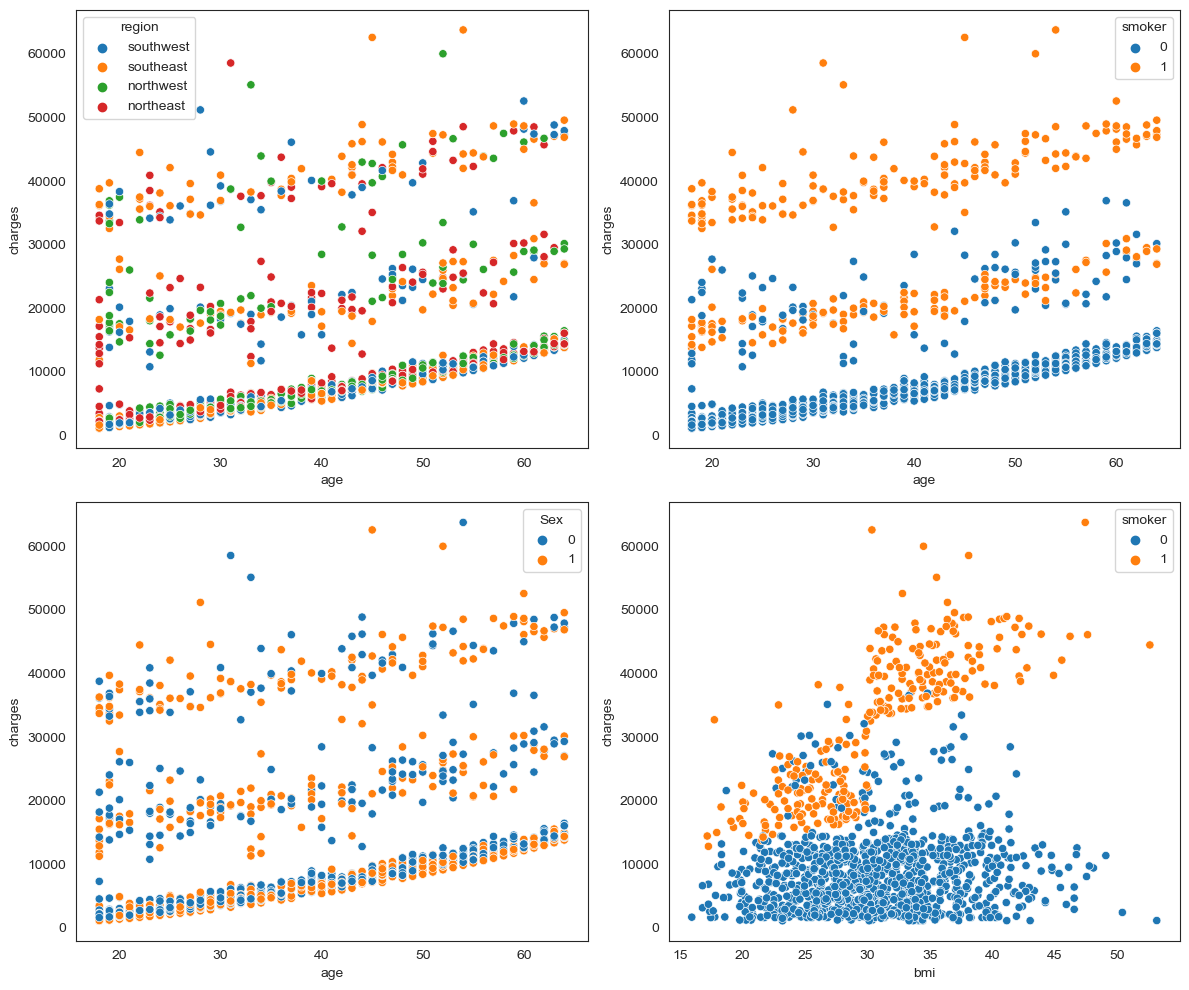

In [138]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12, 10))
sns.scatterplot(data=df, x='age', y='charges', hue='region', ax=ax[0, 0])
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', ax=ax[0, 1])
sns.scatterplot(data=df, x='age', y='charges', hue='Sex', ax=ax[1, 0])
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=ax[1, 1])
plt.tight_layout()
plt.show()

splitting up the data 

In [158]:
x=df.drop(columns=['charges','region','Sex','children'])
y=df['charges']

In [159]:
x

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [160]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [162]:
x_train.shape

(936, 3)

In [163]:
x_test.shape

(402, 3)

Scalling the data 

In [164]:
scaler=StandardScaler()

In [165]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)# here we are not using fit_transfrom coz we expect the the un sceen data also as same std dev

support vector regression model 

In [166]:
regressor=SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [167]:
predict=regressor.predict(scaled_x_test)

In [168]:
predict.shape

(402,)

In [169]:
y_test.shape

(402,)

In [170]:
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predict)
print(mae,mse,rmse,r2)

9426.765653860592 188747782.03751314 13738.550943877346 -0.1119079171813735
